In [168]:
import sys
sys.path.append('..')
from package.gensim_model import gensim_model
model_name = "word2vec-google-news-300"
model = gensim_model(model_name)

word2vec-google-news-300
KeyedVectors<vector_size=300, 3000000 keys>
init complete!


In [169]:
# import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei', 'Noto Sans CJK SC', 'Arial Unicode MS']

In [170]:
word = "Turkey"
similar = model.ETL_similar(word=word)
similar.sort_values(ascending=False).head(20)

(Turkey,)                 1.000000
(Turkish,)                0.750549
(Ankara,)                 0.714325
(Armenia,)                0.662309
(Erdogan,)                0.637652
(Bağış,)                  0.633831
(Turks,)                  0.631578
(Gül,)                    0.628681
(Azerbaijan,)             0.627469
(Erdoğan,)                0.626454
(Istanbul,)               0.621823
(Erdoðan,)                0.614936
(ANKARA_AFX,)             0.613089
(TRNC,)                   0.609654
(Bulgaria,)               0.606645
(Ergün,)                  0.601232
(Cyprus,)                 0.597561
(guard_Kerem_Tunceri,)    0.592899
(İstanbul,)               0.592882
(Macedonia,)              0.589166
Name: Turkey, dtype: float32

In [171]:
import numpy as np
import pandas as pd

def corr_with_creterion(df, upper=1, lower=-1):
    mask = np.triu(np.ones_like(df, dtype=bool), k=1)
    corr_pairs = df.where(mask).stack()
    lower_corr_pairs = corr_pairs[corr_pairs.abs() > lower]
    upper_corr_pairs = corr_pairs[corr_pairs.abs() < upper]

    lower_corr_pairs.name='lower'
    upper_corr_pairs.name='upper'

    corr_pairs = pd.merge(lower_corr_pairs, upper_corr_pairs, how='inner', left_index=True, right_index=True)
    corr_pairs = corr_pairs.drop(columns=['upper'])
    corr_pairs.columns = ['value']
    
    if corr_pairs.empty:
        raise Exception("DataFrame is empty")
    
    return corr_pairs

In [172]:
locale = "en_US"
vector = model.get_locale_vector(locale)
corr_matrix = vector.corr()

In [173]:
high_corr = corr_with_creterion(corr_matrix, upper=0.1, lower=-0.1)
print(high_corr.shape)
# print(high_corr)
print(high_corr.sort_values(by='value').head(10))
print(high_corr.sort_values(by='value').tail(10))

(1104, 1)
                               value
Jersey         Kyrgyzstan  -0.092148
St._Barthélemy Iran        -0.088888
Czechia        Jersey      -0.081742
Armenia        Jersey      -0.080155
St._Barthélemy Uzbekistan  -0.078091
Bhutan         Jersey      -0.068585
St._Barthélemy Serbia      -0.063441
Jersey         Laos        -0.059928
St._Barthélemy North_Korea -0.055848
               Syria       -0.049869
                                             value
Åland_Islands    North_Korea              0.099717
St._Barthélemy   Indonesia                0.099723
Afghanistan      Cook_Islands             0.099742
Jordan           Zambia                   0.099773
Greenland        Palestinian_Territories  0.099781
Canary_Islands   Chad                     0.099826
St._Barthélemy   Tunisia                  0.099906
Norway           St._Helena               0.099922
Poland           Tristan_da_Cunha         0.099924
Ascension_Island San_Marino               0.099939


In [174]:

countries = [
    # North_America
    "United_States", "Canada", "Mexico",
    # South_America
    "Brazil", "Argentina", "Peru", "Colombia",
    # East_Asia
    "China", "Japan", "South_Korea",
    # South_East_Asia
    "Vietnam", "Thailand", "Malaysia", "Indonesia", "Singapore", "Philippines",
    # South_Asia
    "India", "Pakistan",
    # Central_Asia
    "Kazakhstan", "Afghanistan",
    # Middle_East
    "Egypt", "Iran", "Türkiye", "Iraq", "Saudi_Arabia",
    # Europe
    "United_Kingdom", "France", "Germany", "Russia", "Serbia", "Sweden", "Norway", "Italy", "Spain", "Greece",
    # Africa
    "Morocco", "Algeria", "South_Africa", "Nigeria", "Ethiopia", "Tanzania", "Kenya",
    # Oceania
    "Australia", "New_Zealand"
]

locale = "en_US"
vector = model.get_locale_vector(locale)
vector.to_csv("temp.csv")

In [175]:
for column in vector.columns:
    if "Congo" in column or "congo" in column:
        print(column)
    if "US" in column or "United" in column:
        print(column)

United_Arab_Emirates
Congo_-_Kinshasa
Congo_-_Brazzaville
United_Kingdom
United_Nations
United_States


In [176]:
model.get_locle_countries(locale)['TR']

'Türkiye'

In [177]:
print(vector[countries].shape)
vector[countries]

(300, 44)


,United_States,Canada,Mexico,Brazil,Argentina,Peru,Colombia,China,Japan,South_Korea,...,Greece,Morocco,Algeria,South_Africa,Nigeria,Ethiopia,Tanzania,Kenya,Australia,New_Zealand
0,-0.036133,-0.136719,-0.156250,-0.034424,0.030518,-0.195312,-0.030762,-0.073242,0.050781,0.092285,...,0.472656,-0.012451,-0.171875,-0.099121,0.094238,-0.021484,0.039062,0.089355,0.048828,-0.037354
1,-0.048340,-0.154297,-0.125977,0.051025,-0.010254,0.008179,-0.120117,0.135742,0.250000,0.314453,...,0.007019,0.042969,0.102051,0.073730,-0.068359,0.281250,0.121094,0.170898,-0.194336,-0.281250
2,0.235352,0.269531,0.124512,0.132812,0.234375,0.154297,0.156250,0.108887,0.166992,0.251953,...,0.059082,-0.108398,0.243164,0.062500,-0.067383,0.096191,-0.072266,0.025269,-0.041504,-0.160156
3,0.174805,0.273438,0.076172,0.010010,0.108398,0.091309,0.289062,0.083008,0.084473,-0.069824,...,0.090332,0.020874,0.104492,-0.122070,0.045898,0.218750,0.100098,0.048096,0.084473,-0.037598
4,-0.146484,0.086914,-0.074707,-0.017090,0.066406,0.036865,0.094238,-0.127930,-0.265625,-0.126953,...,0.039551,0.065918,0.036865,-0.056396,-0.156250,-0.181641,0.004486,-0.105957,-0.114258,-0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.016235,0.191406,0.357422,0.251953,0.292969,0.279297,0.208984,-0.037842,-0.242188,-0.244141,...,0.462891,0.231445,0.218750,0.213867,0.181641,0.120605,0.220703,0.357422,-0.106934,-0.001793
296,-0.022705,0.074219,0.158203,0.126953,0.025024,0.066895,0.056152,-0.183594,-0.291016,-0.144531,...,-0.425781,-0.006348,-0.033203,0.036621,-0.255859,-0.281250,-0.206055,-0.386719,0.030884,0.110840
297,0.035156,0.020996,0.061035,-0.100098,-0.105469,-0.076172,-0.073730,0.137695,0.133789,0.045166,...,0.024658,-0.087891,-0.017456,-0.140625,-0.166016,-0.055176,-0.137695,-0.138672,0.006622,0.059082
298,0.247070,0.285156,0.172852,-0.003525,0.086426,0.263672,0.157227,0.093750,0.005829,-0.064453,...,0.090332,0.213867,0.028687,0.036377,-0.161133,0.115234,0.008118,0.028198,0.051270,0.133789


In [178]:
corr_matrix = vector[countries].corr()

<Axes: >

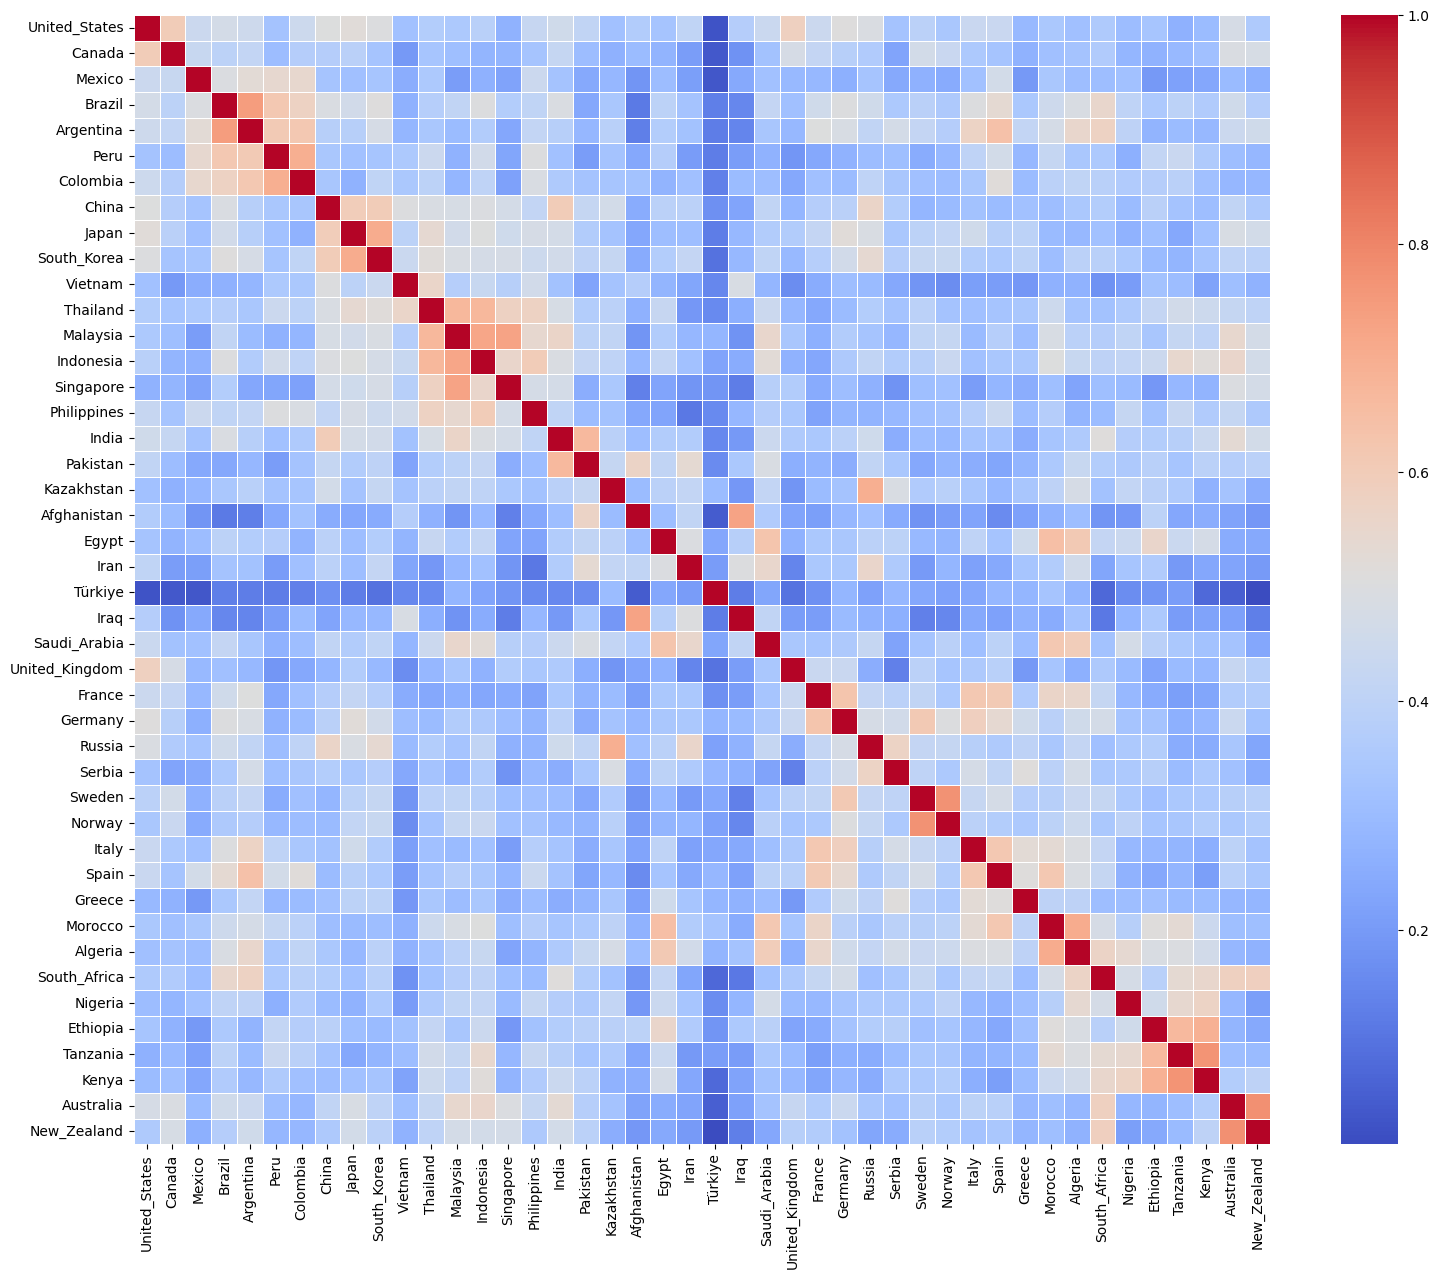

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

width  = corr_matrix.shape[0]/(3*0.8)
height = corr_matrix.shape[1]/3
plt.figure(figsize=(width, height))
sns.heatmap(
    corr_matrix, 
    cmap='coolwarm',
    linewidths=0.5,
    xticklabels=1,
    yticklabels=1,
    )

(44, 44)


<Figure size 1466.67x1466.67 with 0 Axes>

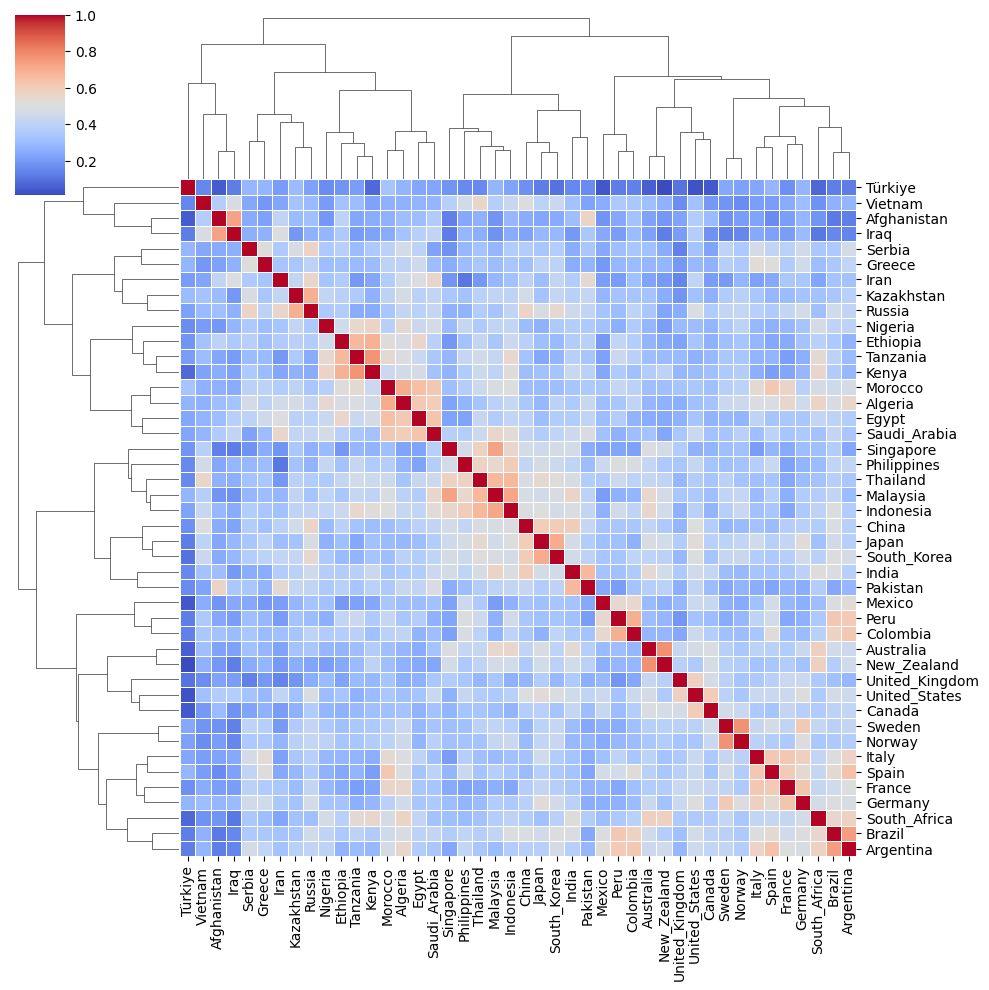

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

print(corr_matrix.shape)
width  = corr_matrix.shape[0]/3
height = corr_matrix.shape[1]/3
plt.figure(figsize=(width, height))
sns.clustermap(corr_matrix, 
               method='ward', 
               cmap='coolwarm', 
               linewidths=0.5,
               xticklabels=1,
               yticklabels=1,
               )

# plt.title('Country Correlation Clustering', y=1.05)
plt.show()

In [181]:
high_corr = corr_with_creterion(corr_matrix, lower=0.6)
print(high_corr.shape)
print(high_corr.sort_values(by='value', ascending=False).head(20))

(33, 1)
                             value
Australia   New_Zealand   0.774840
Sweden      Norway        0.770918
Tanzania    Kenya         0.767618
Brazil      Argentina     0.743133
Malaysia    Singapore     0.727911
Afghanistan Iraq          0.727606
Malaysia    Indonesia     0.721976
Japan       South_Korea   0.705440
Morocco     Algeria       0.704384
Peru        Colombia      0.698572
Kazakhstan  Russia        0.698039
Ethiopia    Kenya         0.690012
Thailand    Indonesia     0.669491
            Malaysia      0.668362
India       Pakistan      0.667136
Ethiopia    Tanzania      0.665291
Egypt       Morocco       0.648291
Argentina   Spain         0.638457
Egypt       Saudi_Arabia  0.628160
France      Germany       0.627675


In [185]:
low_corr = corr_with_creterion(corr_matrix, upper=0.4, lower=0.3)
print(low_corr.shape)
print(low_corr.sort_values(by='value').head(20))

(350, 1)
                              value
Colombia      Germany      0.300299
Thailand      Germany      0.300389
Greece        Kenya        0.300521
Kazakhstan    Türkiye      0.300650
Canada        Afghanistan  0.300697
China         Spain        0.300938
United_States Kenya        0.301096
Kazakhstan    Afghanistan  0.301150
Peru          Russia       0.301634
Colombia      Norway       0.301919
Malaysia      Greece       0.302267
Saudi_Arabia  Greece       0.302306
Philippines   Greece       0.302495
India         Sweden       0.302603
Canada        Peru         0.302658
United_States Nigeria      0.303741
Vietnam       Tanzania     0.303863
Mexico        Egypt        0.304484
Philippines   Pakistan     0.304946
Canada        Pakistan     0.305044


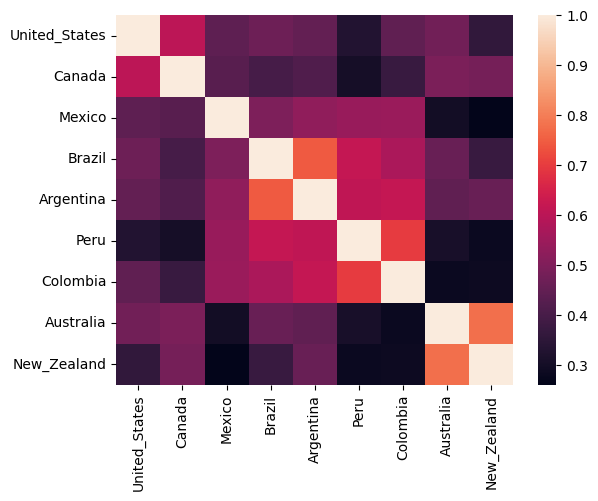

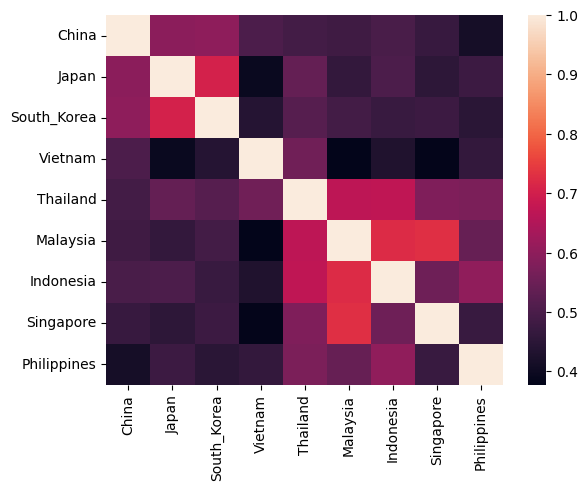

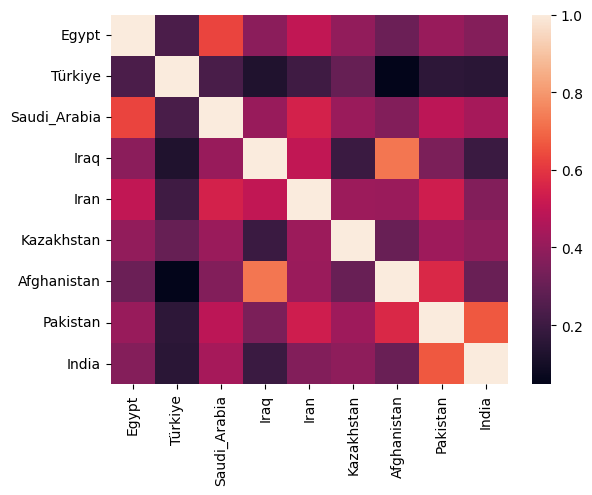

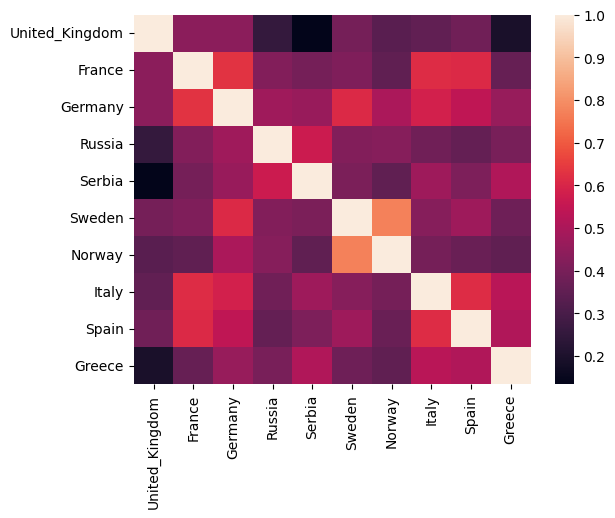

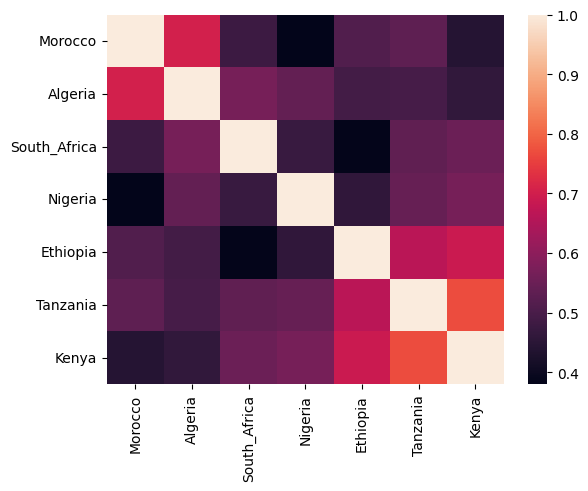

In [188]:
region = {
    "America&Oceania": ["United_States", "Canada", "Mexico", "Brazil", "Argentina", "Peru", "Colombia", "Australia", "New_Zealand"],
    "East_Asia": ["China", "Japan", "South_Korea", "Vietnam", "Thailand", "Malaysia", "Indonesia", "Singapore", "Philippines"],
    "Middle_East": ["Egypt", "Türkiye", "Saudi_Arabia", "Iraq", "Iran", "Kazakhstan", "Afghanistan", "Pakistan", "India"],
    "Europe": ["United_Kingdom", "France", "Germany", "Russia", "Serbia", "Sweden", "Norway", "Italy", "Spain", "Greece"],
    "Africa": ["Morocco", "Algeria", "South_Africa", "Nigeria", "Ethiopia", "Tanzania", "Kenya"], 
}

import seaborn as sns
import matplotlib.pyplot as plt

for key, value in region.items():
    sns.heatmap(vector[value].corr())
    plt.show()
    plt.close()

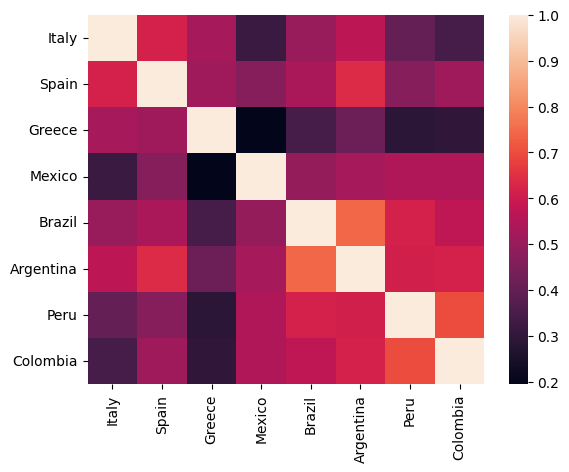

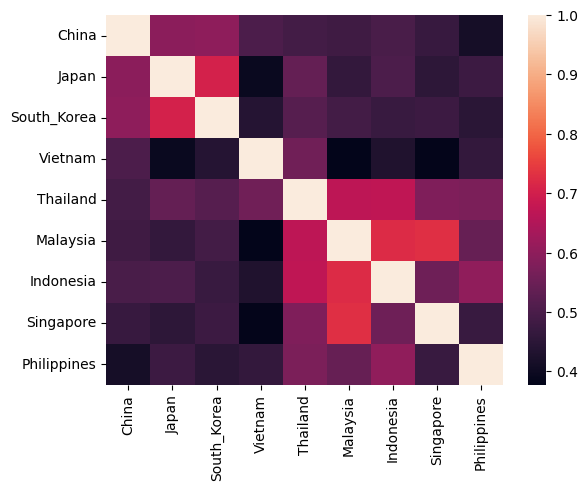

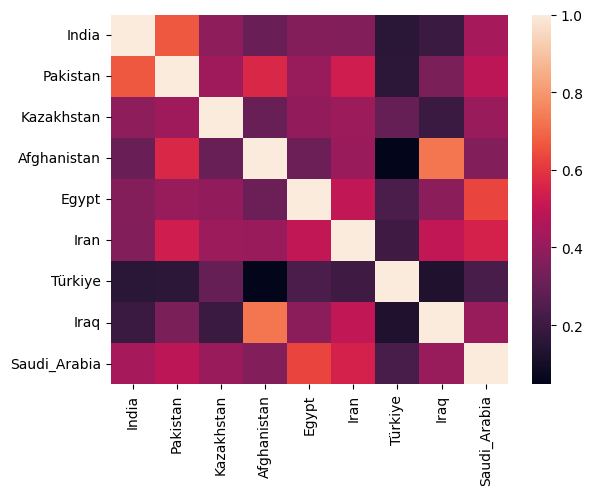

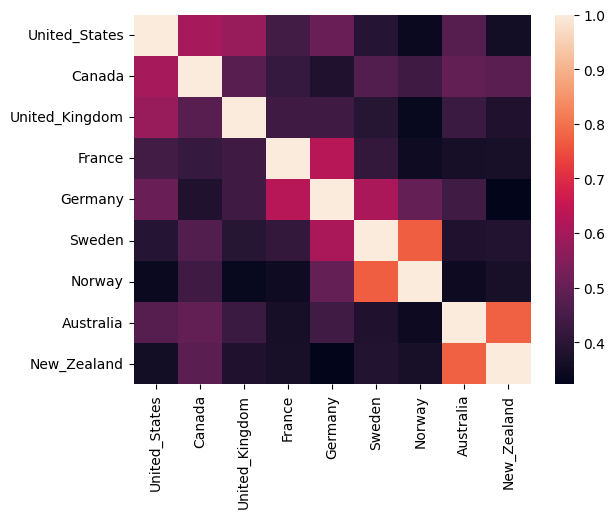

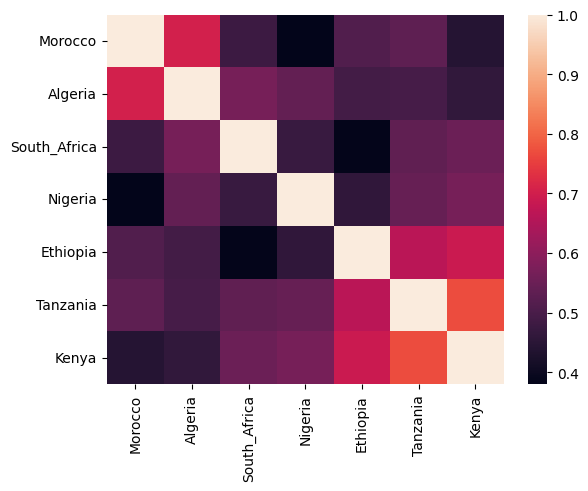

In [187]:
language = {
    "Latin": ["Italy", "Spain", "Greece", "Mexico", "Brazil", "Argentina", "Peru", "Colombia"],
    "East_Asia": ["China", "Japan", "South_Korea", "Vietnam", "Thailand", "Malaysia", "Indonesia", "Singapore", "Philippines"],
    "Arabic": ["India", "Pakistan", "Kazakhstan", "Afghanistan", "Egypt", "Iran", "Türkiye", "Iraq", "Saudi_Arabia"],
    "English": ["United_States", "Canada", "United_Kingdom", "France", "Germany", "Sweden", "Norway", "Australia", "New_Zealand"],
    "Africa": ["Morocco", "Algeria", "South_Africa", "Nigeria", "Ethiopia", "Tanzania", "Kenya"],
}

import seaborn as sns
import matplotlib.pyplot as plt

for key, value in language.items():
    sns.heatmap(vector[value].corr())
    plt.show()
    plt.close()

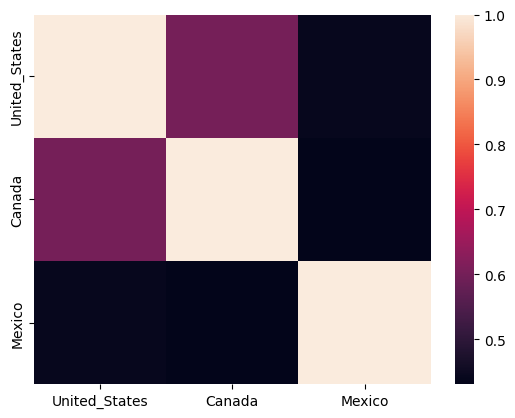

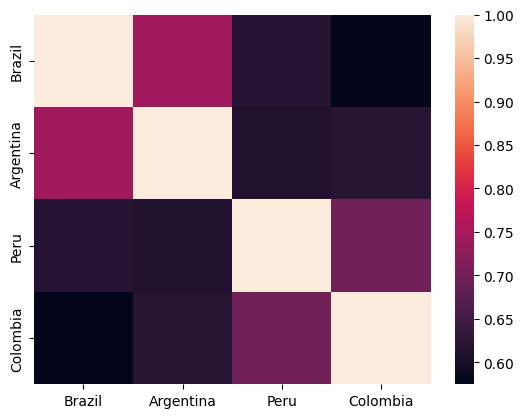

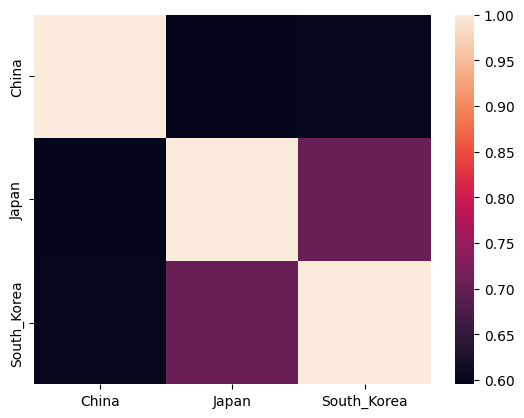

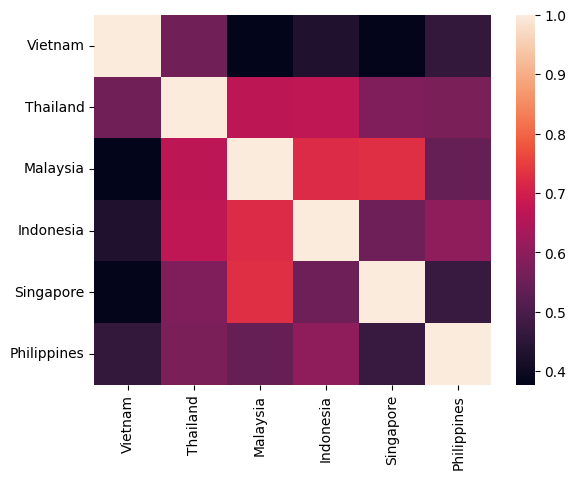

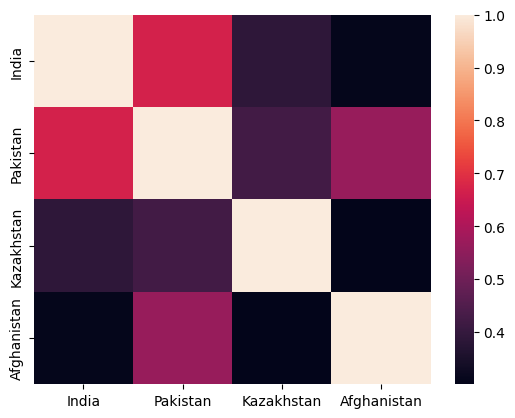

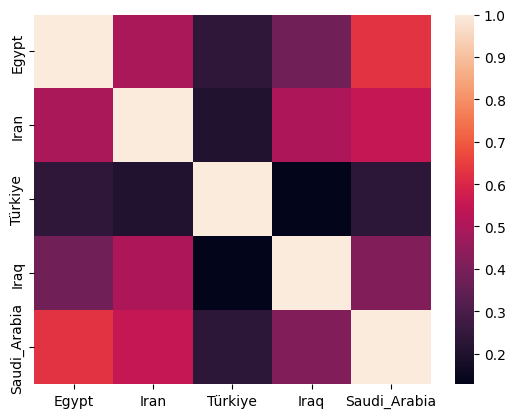

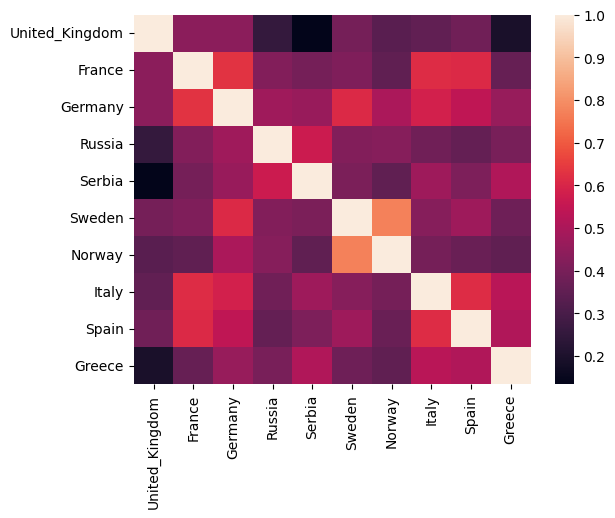

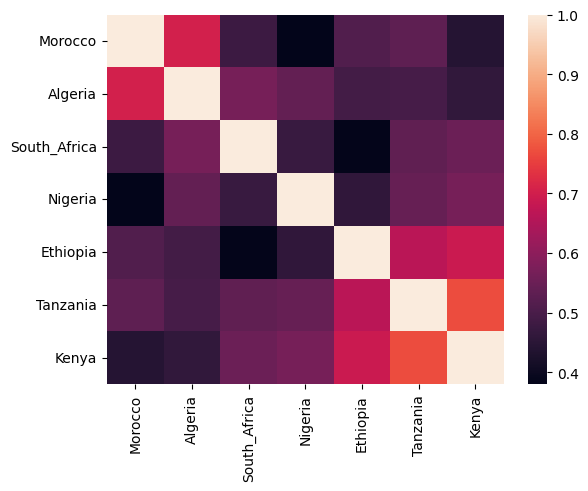

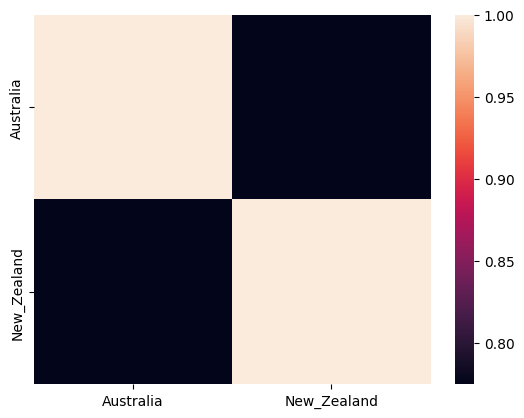

In [184]:
world_map = {
    "North_America": ["United_States", "Canada", "Mexico"],
    "South_America": ["Brazil", "Argentina", "Peru", "Colombia"],
    "East_Asia": ["China", "Japan", "South_Korea"],
    "South_East_Asia": ["Vietnam", "Thailand", "Malaysia", "Indonesia", "Singapore", "Philippines"],
    "Central&South_Asia": ["India", "Pakistan", "Kazakhstan", "Afghanistan"],
    "Middle_East": ["Egypt", "Iran", "Türkiye", "Iraq", "Saudi_Arabia"],
    "Europe": ["United_Kingdom", "France", "Germany", "Russia", "Serbia", "Sweden", "Norway", "Italy", "Spain", "Greece"],
    "Africa": ["Morocco", "Algeria", "South_Africa", "Nigeria", "Ethiopia", "Tanzania", "Kenya"], 
    "Oceania": ["Australia", "New_Zealand"]
}

import seaborn as sns
import matplotlib.pyplot as plt

for key, value in world_map.items():
    sns.heatmap(vector[value].corr())
    plt.show()
    plt.close()